<a href="https://colab.research.google.com/github/mrymsadeghi/Colab_notebooks/blob/main/segmentation_A_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import normalize
import os
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from keras import backend as K
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/MB_project/Segmentation_group_A

/content/gdrive/MyDrive/MB_project/Segmentation_group_A


In [ ]:
path = "seg_dataset_2/testset1"
#Resizing images, if needed
SIZE_X = 256 
SIZE_Y = 256
n_classes=6 #Number of classes for segmentation

#Capture training image info as a list
test_images = []
test_masks = [] 
test_img_paths= []
mask_paths = []
for imgname in os.listdir(path):
    if "mask" not in (imgname):
        imgname0 = imgname.split(".")[0]
        #print(imgname0)
        img_path = os.path.join(path, imgname)
        img = cv.imread(img_path, 0)
        img = cv.resize(img, (SIZE_Y, SIZE_X))
        test_images.append(img)
        maskname = imgname0 + "_mask.png"
        mask_path = os.path.join(path, maskname)  
        mask = cv.imread(mask_path, 0)
        mask = cv.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        test_masks.append(mask)
        test_img_paths.append(img_path)
        mask_paths.append(mask_path)



test_images = np.array(test_images)
test_masks = np.array(test_masks)

In [ ]:
test_images = np.expand_dims(test_images, axis=3)
test_images = normalize(test_images, axis=1)

test_masks_input = np.expand_dims(test_masks, axis=3)

In [ ]:
model = load_model('models/seg_1_22_5')


<class 'numpy.ndarray'> (1, 256, 256)
1/1 [==============================] - 8s 8s/step


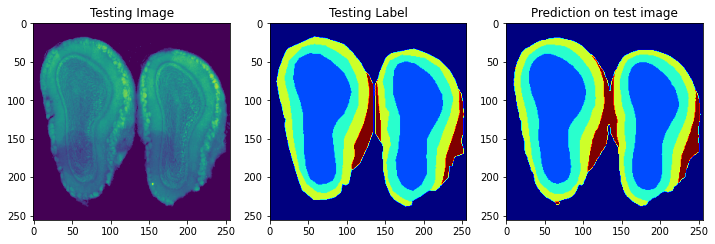

In [ ]:
img_path = "seg_dataset_2/testset1/img_1.png"
mask_path = "seg_dataset_2/testset1/img_1_mask.png"

img = cv.imread(img_path, 0)
test_img = cv.resize(img, (SIZE_Y, SIZE_X))
test_img_input=np.expand_dims(test_img, 0)
test_img_norm = normalize(test_img_input, axis=1)

img_mask = cv.resize(cv.imread(mask_path, 0), (SIZE_Y, SIZE_X))


print(type(test_img_input),test_img_input.shape)
#print("test_img_input", range_of_vals(test_img_input))
#print("test_img_norm", range_of_vals(test_img_norm, axis=1))

prediction = (model.predict(test_img_norm))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
#print(np.unique(predicted_img))
h,w = img.shape
#predicted_img_resized = cv.resize(predicted_img, (h, w))
predicted_img2 = predicted_img *40
#print(np.unique(predicted_img2))

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(img_mask, cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img2, cmap='jet')
plt.show()

In [ ]:
# Dice Scores

dfs = {}
for i in range(n_classes):
  dfs[i]=[]

for test_img_number in range(24):

  test_img = test_images[:,:,:,0][test_img_number]
  img_mask = test_masks_input[:,:,:,0][test_img_number]
  test_img_input = np.expand_dims(test_img, 0)

  prediction = (model.predict(test_img_input))
  predicted_img = np.argmax(prediction, axis=3)[0,:,:]
  img_mask_exp = np.zeros((SIZE_X, SIZE_Y, n_classes))
  img_pred_exp = np.zeros((SIZE_X, SIZE_Y, n_classes))
  for i in range(n_classes):
    img_mask_exp[:,:,i][img_mask==i]=1
    img_pred_exp[:,:,i][predicted_img==i]=1
    df = dice_coef1(img_mask_exp[:,:,i], img_pred_exp[:,:,i]).numpy()
    dfs[i].append(df)

# plt.figure(figsize=(12, 8))
# plt.subplot(231)
# plt.title('Testing Image')
# plt.imshow(test_img)
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(img_mask)
# plt.subplot(233)
# plt.title('Prediction on test image')
# plt.imshow(predicted_img)
# plt.show()



""""""
print(dfs)

1/1 [==============================] - 0s 18ms/step
{0: [0.9817831666244466, 0.9568702418090876, 0.9831568474170715, 0.9854268882122781, 0.9881883507832379, 0.9887624261635389, 0.983726246119482, 0.9823488958511816, 0.980245728205753, 0.9881128496094799, 0.9844490802202344, 0.9881861968341489, 0.9827840794687096, 0.9816207657075229, 0.938515901061157, 0.985234144283764, 0.9891435864288343, 0.9813070708040994, 0.9783756172317661, 0.9815494928300641, 0.9808948641580264, 0.9826265953069967, 0.9848668168198934, 0.9840930849108165], 1: [0.976067096001915, 0.9232311754311945, 0.9894472214917288, 0.9719495979240186, 0.9864352753679322, 0.990806019377827, 0.9887435564754797, 0.9825162838537734, 0.9807105029192968, 0.9871236567565674, 0.9901974612133216, 0.9828476510315658, 0.9810170782813467, 0.9797200451349541, 0.8383713756981706, 0.9808439566439142, 0.9803255767508797, 0.9917259840606033, 0.9825179563634405, 0.9776429058036278, 0.9728118906599165, 0.9806192468625734, 0.9520922458012836, 0.97

In [ ]:
dfss = []
for i in range(6):
  avg = sum(dfs[i]) / len(dfs[i])
  print(f"Dice score of {str(i)}: {str(avg)}")
  dfss.append(avg)

dfss

Dice score of 0: 0.9809278723692328
Dice score of 1: 0.9725534390748404
Dice score of 2: 0.9204275803665108
Dice score of 3: 0.89606050039164
Dice score of 4: 0.9428850321319157
Dice score of 5: 0.8331419689927658


[0.9809278723692328,
 0.9725534390748404,
 0.9204275803665108,
 0.89606050039164,
 0.9428850321319157,
 0.8331419689927658]

In [ ]:
dfregs = {"bg":dfs[0], "MOBgr":dfs[1], "MOBop":dfs[2], "MOBgl":dfs[3], "AOB":dfs[4], "fiber tracts":dfs[5]}

In [ ]:
df_pd = pd.DataFrame.from_dict(dfregs)
df_pd.head(3)

,bg,MOBgr,MOBop,MOBgl,AOB,fiber tracts
0,0.981783,0.976067,0.925770,0.891151,0.931075,0.790364
1,0.956870,0.923231,0.775412,0.737148,1.000000,0.689323
2,0.983157,0.989447,0.956339,0.924859,1.000000,0.897052


In [ ]:
sum(dfss) / len(dfss)

0.9247671172011779

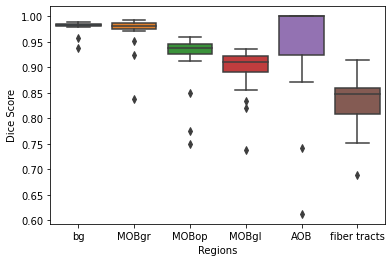

In [ ]:
fig = sns.boxplot(data=df_pd)
plt.xlabel("Regions")
plt.ylabel("Dice Score")
plt.show(fig)

In [ ]:
def dice_coef1(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


<class 'numpy.ndarray'> (256, 256)
<class 'numpy.ndarray'> (1, 256, 256)
1/1 [==============================] - 0s 20ms/step


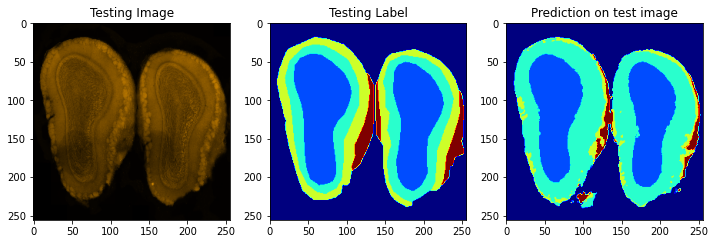

In [ ]:
#for i in range(len(test_images)):
test_img_number = i
test_img = test_images[test_img_number]
print(type(test_img),test_img.shape)

ground_truth=test_masks_input[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
print(type(test_img_input),test_img_input.shape)

prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

orig_img = cv.resize(cv.imread(test_img_paths[i]), (SIZE_Y, SIZE_X))

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(orig_img[:,:,::-1])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')

#plt.savefig(f"/content/gdrive/MyDrive/MB_project/Segmentation_group_A/seg_dataset_2/results1/pred_{str(i)}.png")
plt.show()


1/1 [==============================] - 0s 19ms/step


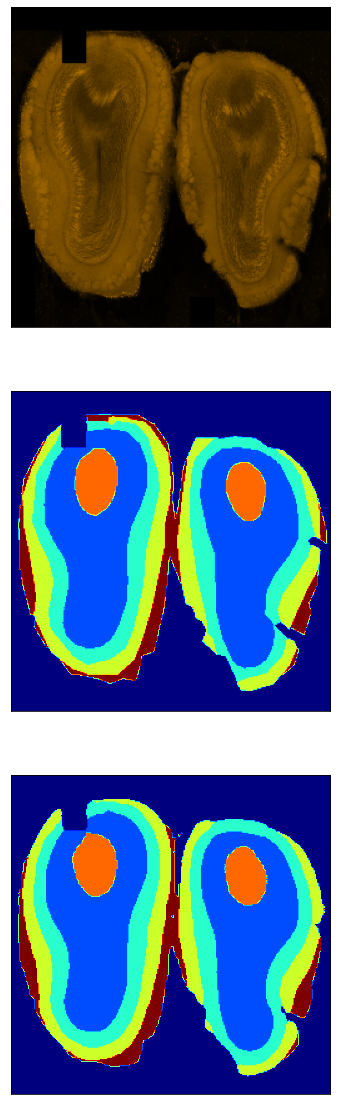

1/1 [==============================] - 0s 19ms/step


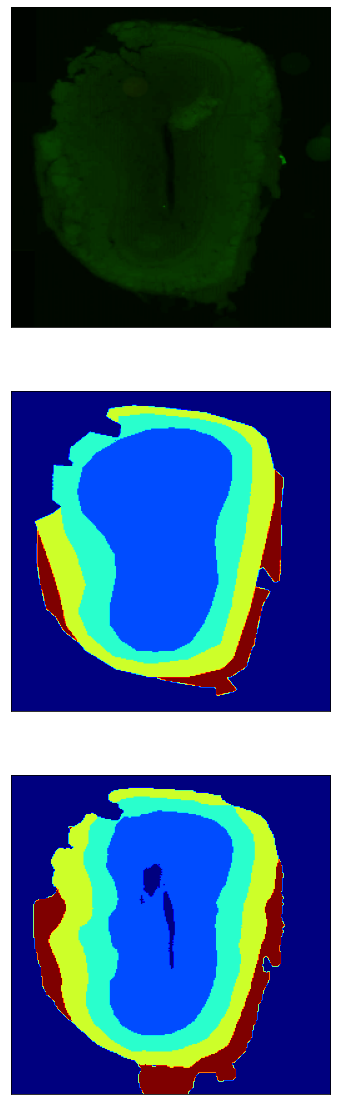

1/1 [==============================] - 0s 19ms/step


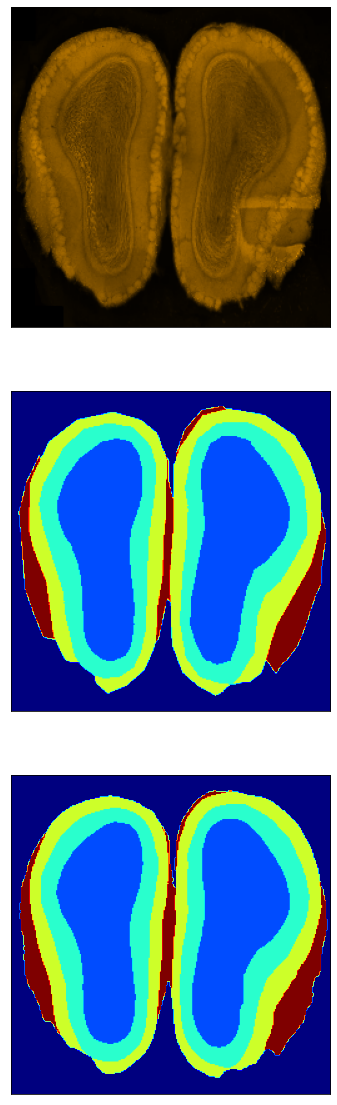

1/1 [==============================] - 0s 19ms/step


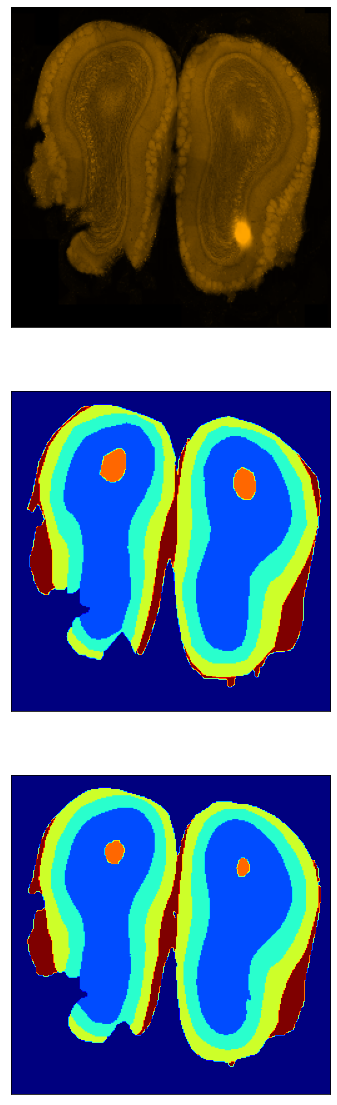

1/1 [==============================] - 0s 19ms/step


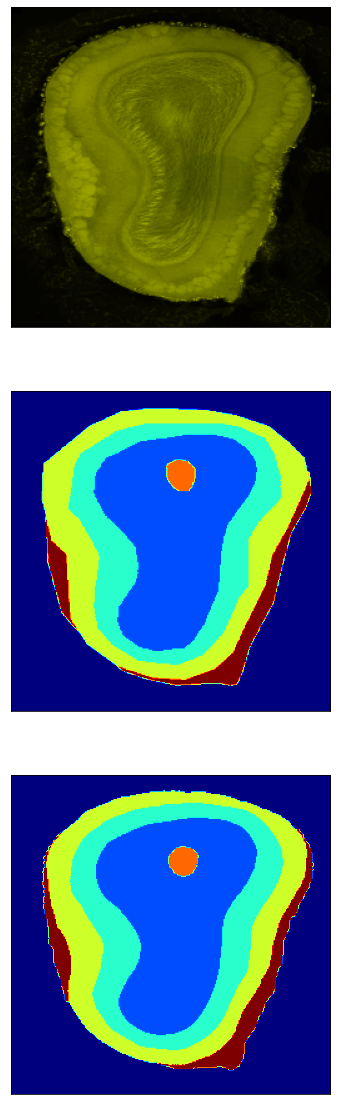

1/1 [==============================] - 0s 19ms/step


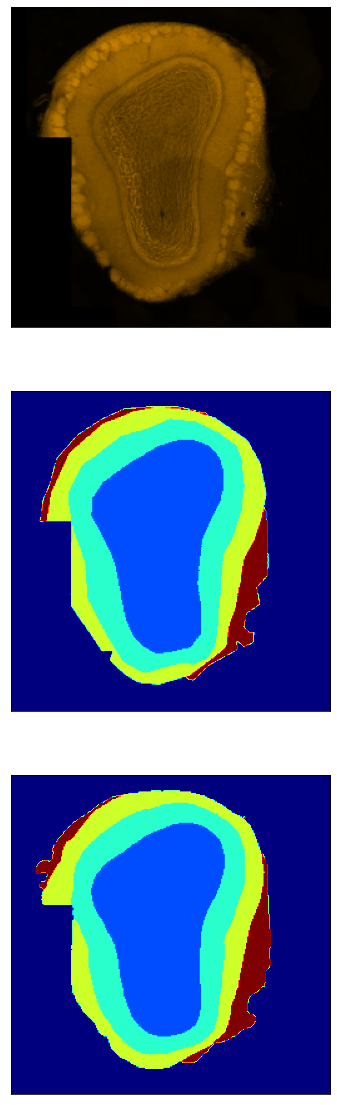

1/1 [==============================] - 0s 21ms/step


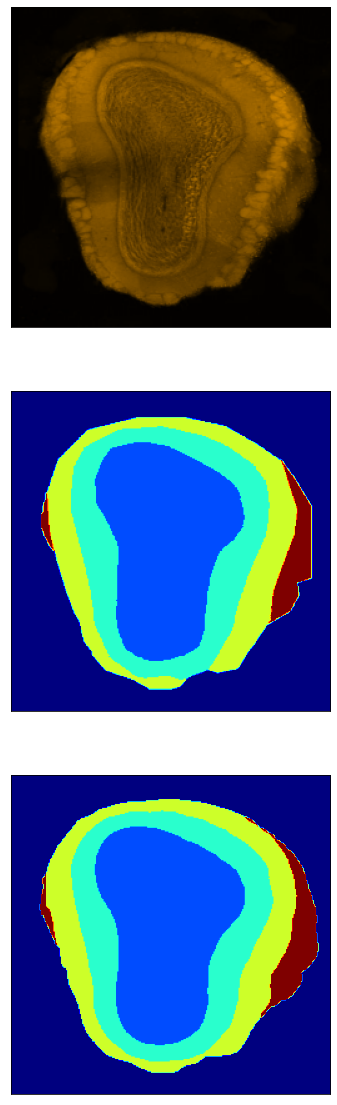

1/1 [==============================] - 0s 19ms/step


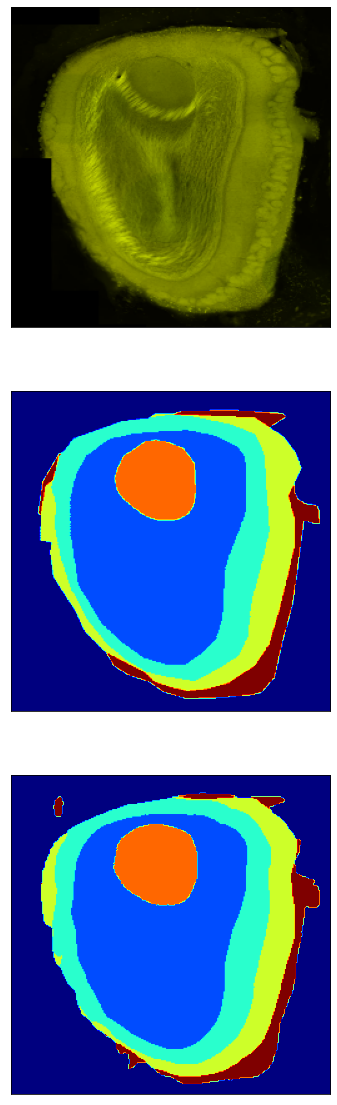

1/1 [==============================] - 0s 19ms/step


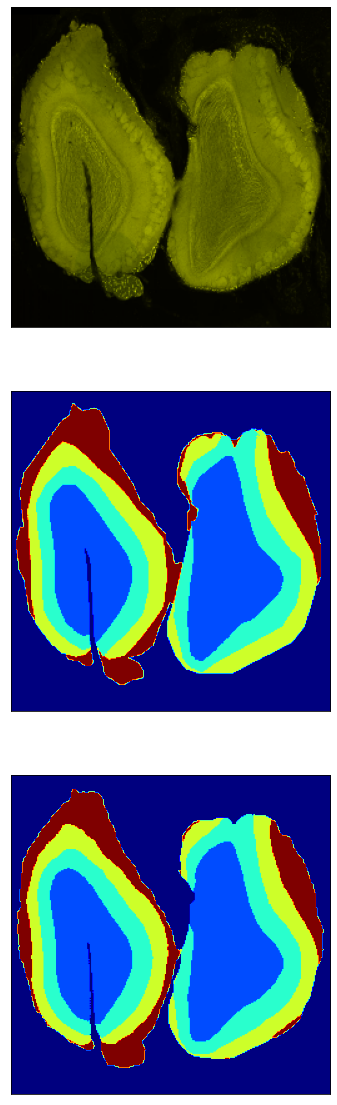

1/1 [==============================] - 0s 19ms/step


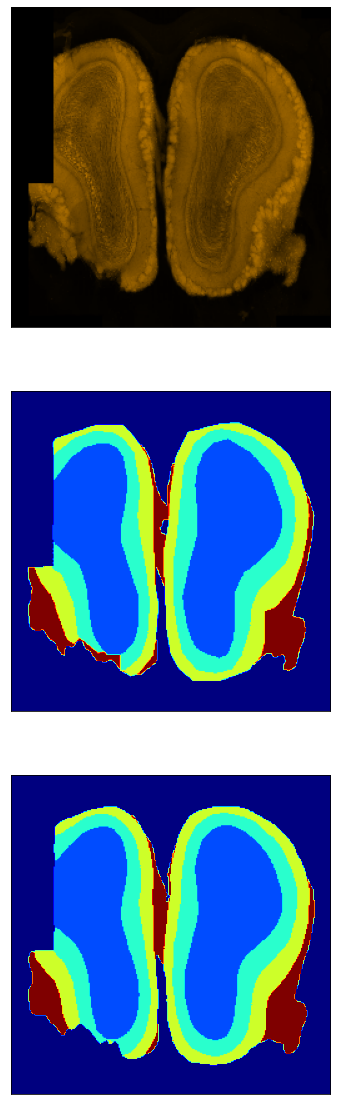

1/1 [==============================] - 0s 18ms/step


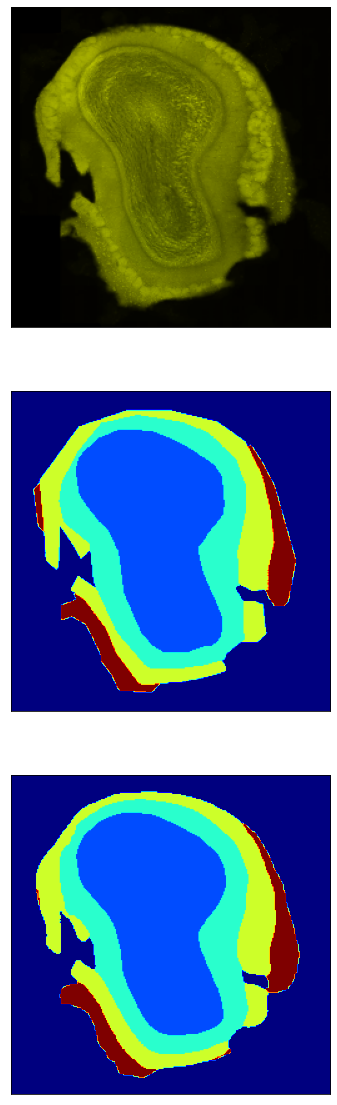

1/1 [==============================] - 0s 19ms/step


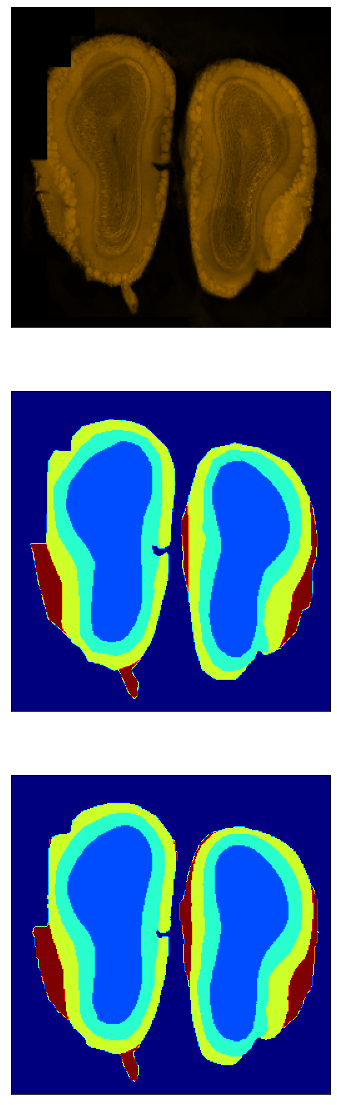

1/1 [==============================] - 0s 18ms/step


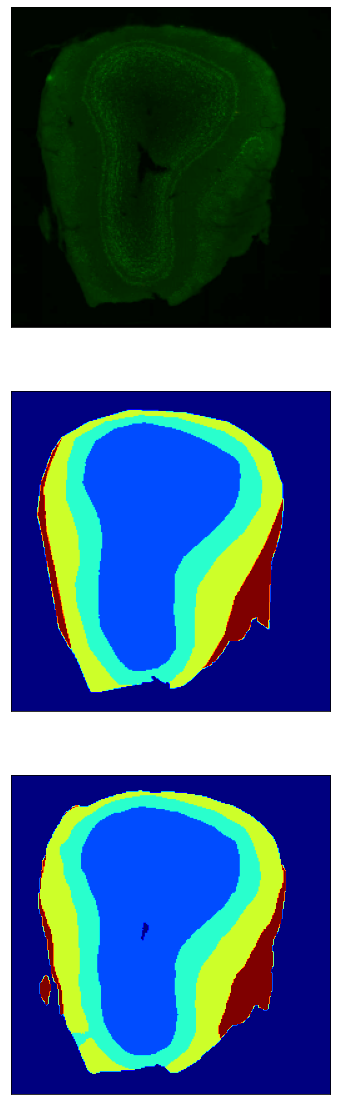

1/1 [==============================] - 0s 21ms/step


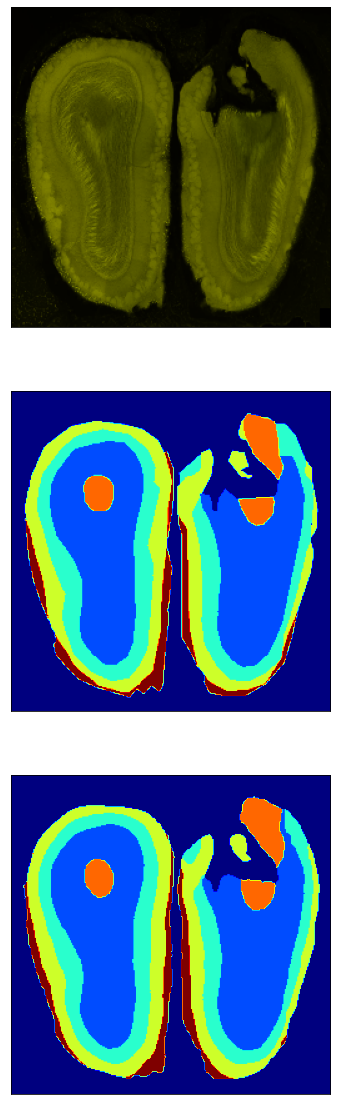

1/1 [==============================] - 0s 19ms/step


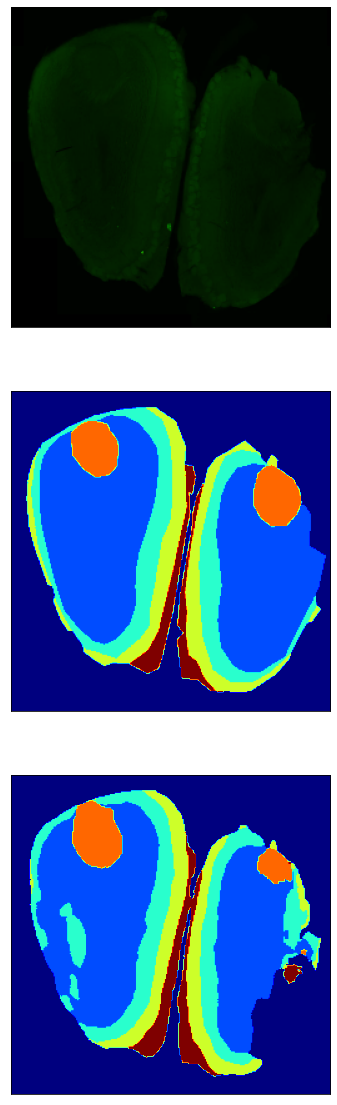

1/1 [==============================] - 0s 19ms/step


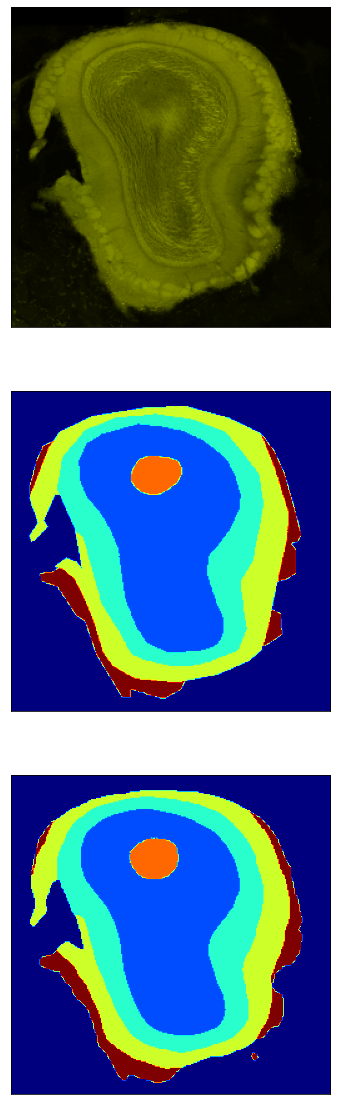

1/1 [==============================] - 0s 20ms/step


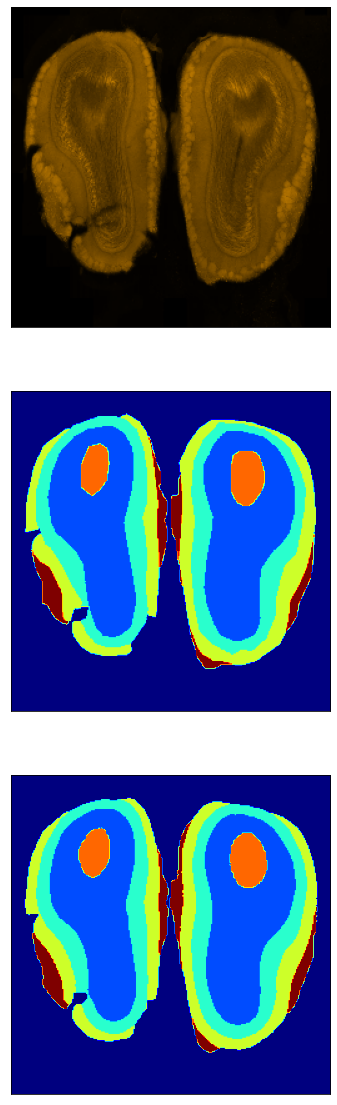

1/1 [==============================] - 0s 19ms/step


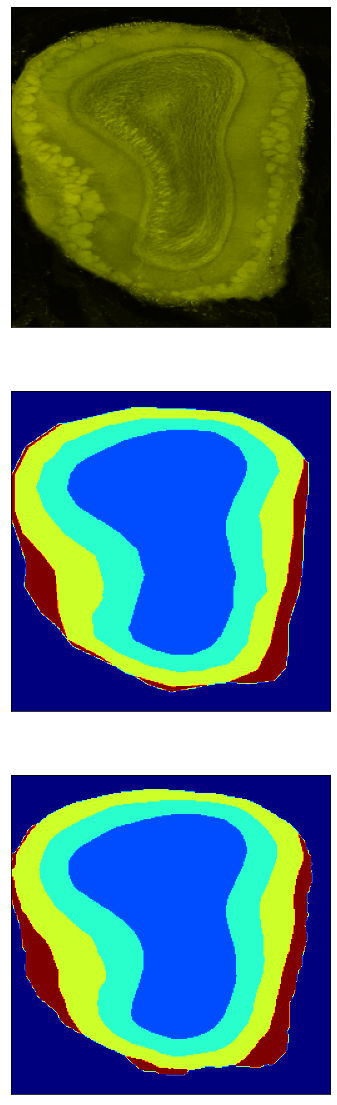

1/1 [==============================] - 0s 23ms/step


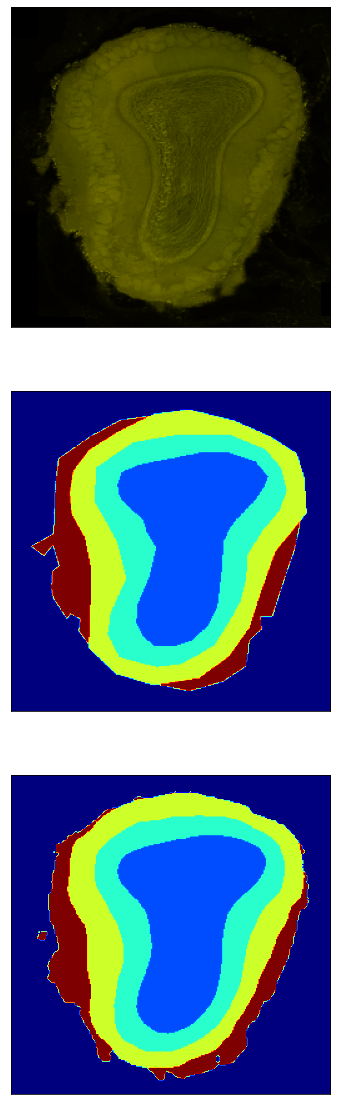

1/1 [==============================] - 0s 25ms/step


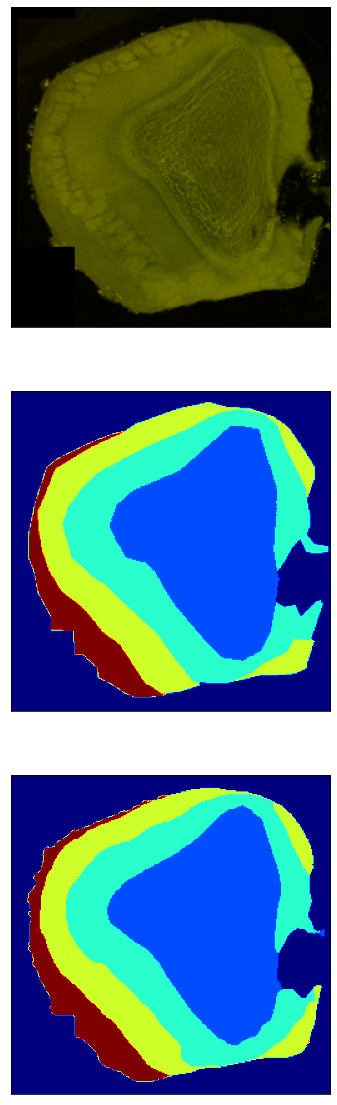

1/1 [==============================] - 0s 18ms/step


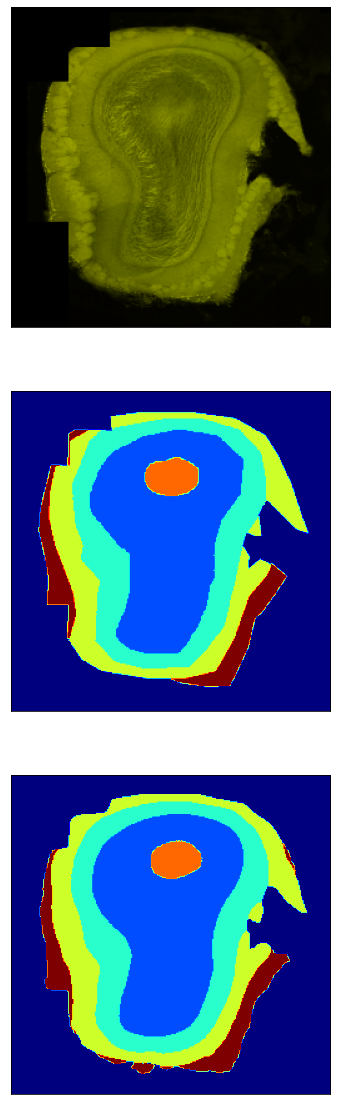

1/1 [==============================] - 0s 19ms/step


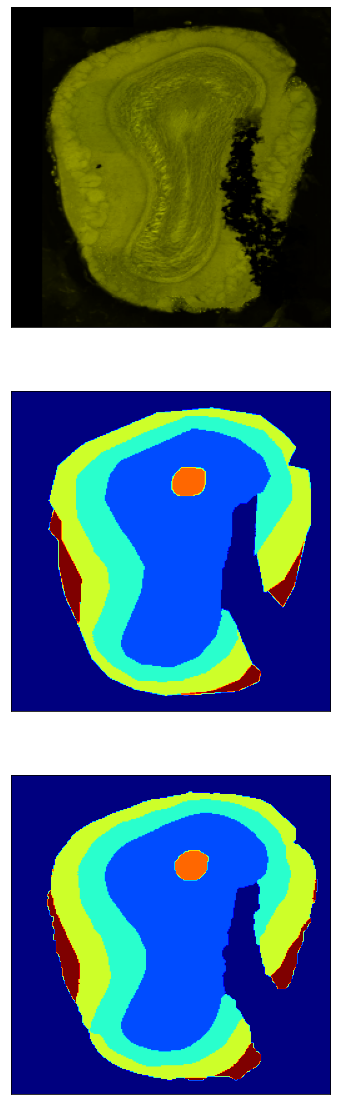

1/1 [==============================] - 0s 18ms/step


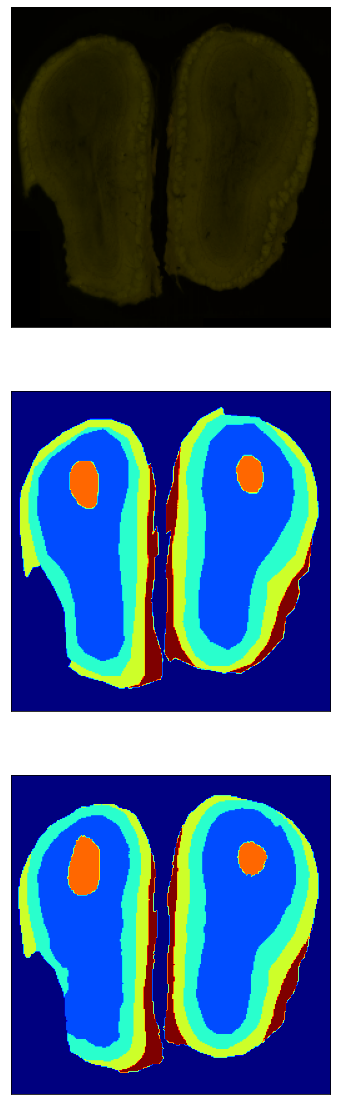

1/1 [==============================] - 0s 20ms/step


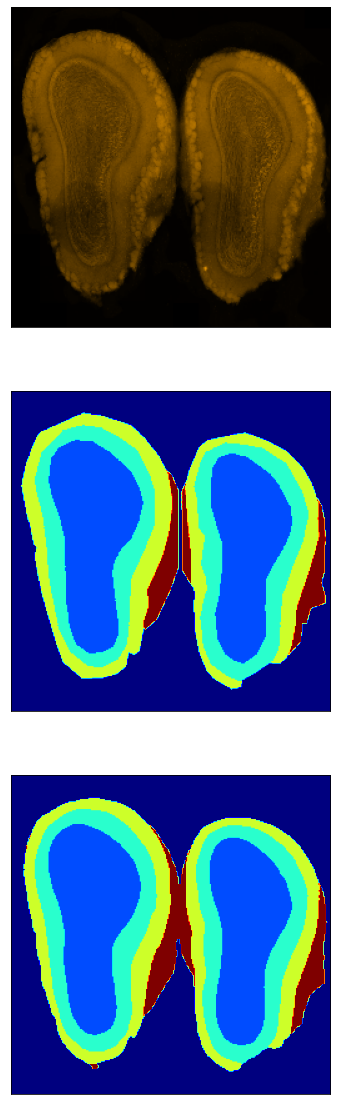

In [ ]:
for i in range(len(test_images)):
  test_img_number = i

  img = cv.imread(test_img_paths[i], 0)
  test_img = cv.resize(img, (SIZE_Y, SIZE_X))
  test_img_input=np.expand_dims(test_img, 0)
  test_img_norm = normalize(test_img_input, axis=1)

  img_mask = cv.resize(cv.imread(mask_paths[i], 0), (SIZE_Y, SIZE_X))



  prediction = (model.predict(test_img_norm))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  orig_img = cv.resize(cv.imread(test_img_paths[i]), (SIZE_Y, SIZE_X))

  plt.figure(figsize=(8, 20))
  plt.subplot(311)
  plt.imshow(orig_img[:,:,::-1])
  plt.xticks([])
  plt.yticks([])
  plt.subplot(312)
  plt.imshow(img_mask, cmap='jet')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(313)
  plt.imshow(predicted_img, cmap='jet')
  plt.xticks([])
  plt.yticks([])
  plt.savefig(f"/content/gdrive/MyDrive/MB_project/Segmentation_group_A/seg_dataset_2/results1/pred_{str(i)}.png")
  plt.show()